<a href="https://colab.research.google.com/github/marziyeh-sa/Machine_Learning_Fall2020/blob/main/Hands_On/HO6_PCA_LDA_ML2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://arch.ut.ac.ir/documents/70819125/2017cca1-b036-41de-bcce-f7376699275b' alt="UT logo" width="120" height="120" align="left">

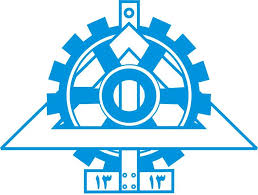

<h1 align=center><font size=5> <b><i>Machine Learning(Fall 2020)</b><br>Hands-On 6</i></font></h1>

# Normalizations

* Z-Scoring : 1. Mean Normalization, 2. Standardization

* Whitening Transformation

## Visualizing Data and Covariance Matrices

The heatmap function from Seaborn is used to create gradients of color: small values will be colored in light green and large values in dark blue. 

In [ ]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n'), ACov

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 10)

    ax0 = plt.subplot(2, 2, 1)

    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(2, 2, 2)

    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)

    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

## Uncorrelated Data
We can see on the scatterplot that the two dimensions are uncorrelated. Note that we have one dimension with a mean of 1 and the other with the mean of 2. Also, the covariance matrix shows that the variance of each variable is very large (around 1) and the covariance of columns 1 and 2 is very small (around 0). Since we insured that the two vectors are independent this is coherent (the opposite is not necessarily true: a covariance of 0 doesn’t guaranty independency

Covariance matrix:



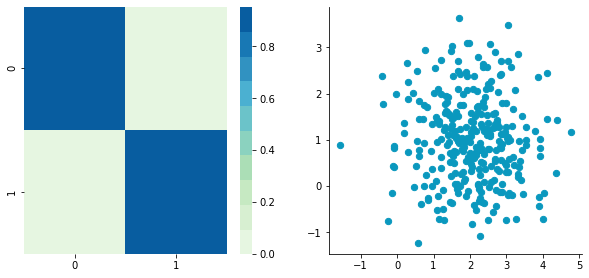

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Simulating Uncorrelated Data

np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T

# Plot Data and its Covariance
plotDataAndCov(A)
plt.show()
plt.close()

## Correlated Data

Covariance matrix:



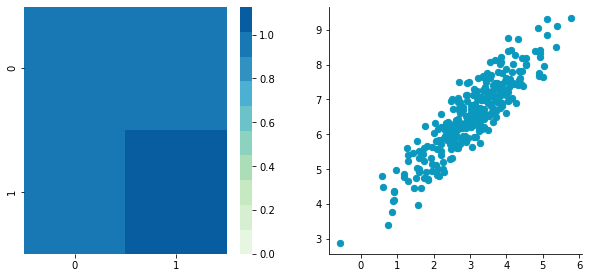

In [ ]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

# Z-Scoring

### Step 1 of Z-Scoring: Mean Normalization

In [ ]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Before:


Covariance matrix:



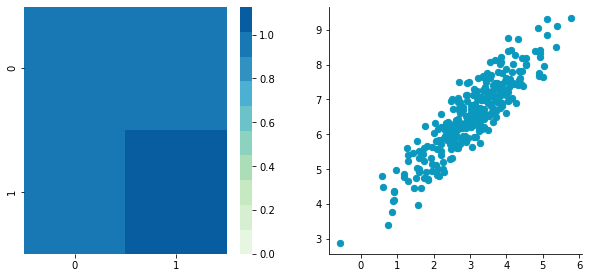

After:


Covariance matrix:



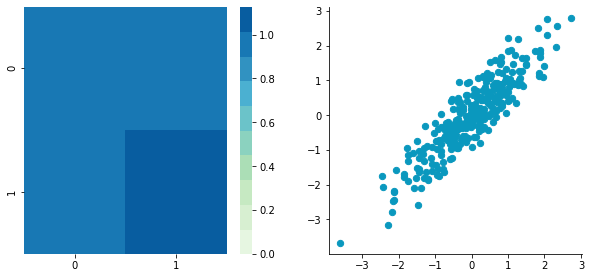

In [ ]:
BCentered = center(B)

print ('Before:\n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print ('After:\n\n')
plotDataAndCov(BCentered)
plt.show()
plt.close()

### Step 2 of Z-Scoring: Standardization

The standardization is used to put all features on the same scale. The way to do it is to divide each zero-centered dimension by its standard deviation.

In [ ]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Covariance matrix:



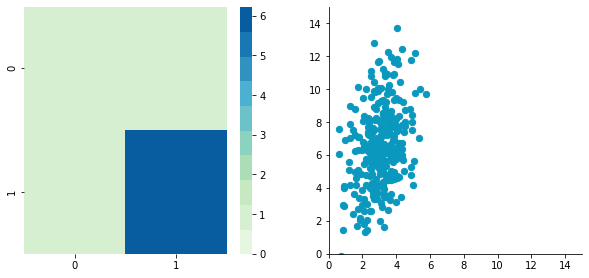

In [ ]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:



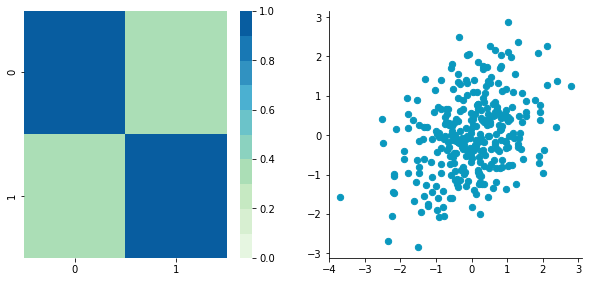

In [ ]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

# Whitening

Whitening or sphering data means that we want to transform it in a way to have a covariance matrix that is the identity matrix.

Steps:

1. Zero-center the data
2. Decorrelate the data
3. Rescale the data

## 1. Zero Centering

Covariance matrix:



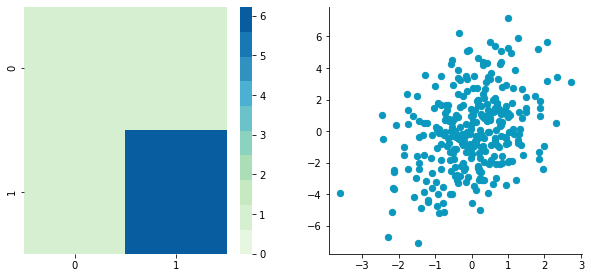

In [ ]:
CCentered = center(C)

plotDataAndCov(CCentered)
plt.show()
plt.close()

## 2. Decorrelating

We need to decorrelate our data. Intuitively, it means that we want to rotate the data until there is no correlation anymore. The left plot shows correlated data. For instance, if you take a data point with a big x value, chances are that y will also be quite big. Now take all data points and do a rotation (maybe around 45 degrees counterclockwise): the new data (plotted on the right) is not correlated anymore.

<img src="https://hadrienj.github.io/assets/images/Preprocessing-for-deep-learning/rotation.png">

The question is: how could we find the right rotation in order to get the uncorrelated data? Actually, it is exactly what the eigenvectors of the covariance matrix do: they indicate the direction where the spread of the data is at its maximum:

<img src="https://hadrienj.github.io/assets/images/Preprocessing-for-deep-learning/maxVar.png">

The eigenvectors of the covariance matrix give you the direction that maximizes the variance. The direction of the green line is where the variance is maximum. Just look at the smallest and largest point projected on this line: the spread is big. Compare that with the projection on the orange line: the spread is very small.

So we can decorrelate the data by projecting it on the eigenvectors basis. This will have the effect to apply the rotation needed and remove correlations between the dimensions. Here are the steps:

1. Calculate the covariance matrix
2. Calculate the eigenvectors of the covariance matrix
3. Apply the matrix of eigenvectors to the data (this will apply the rotation)

In [ ]:
def decorrelate(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

In [ ]:
plotDataAndCov(C)
plt.show()
plt.close()

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

## 3. Rescaling the Data

We should scale the uncorrelated matrix in order to obtain a covariance matrix corresponding to the identity matrix. To do that we scale our decorrelated data by dividing each dimension by the square-root of its corresponding eigenvalue.

In [ ]:
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

Covariance matrix:



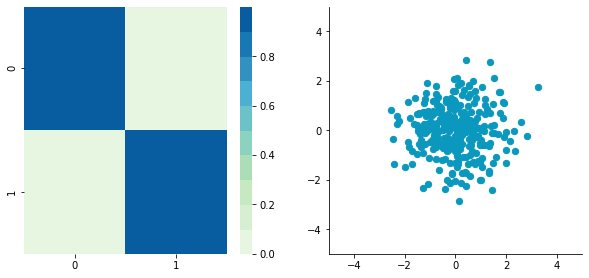

In [ ]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

# Feature Conditioning

There is almost always need to reduce dimension of the feature space due to the low number of samples with respect to features.

Therefore, to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets we exploit 

different techniques of feature selection or dimension reduction.

Some Benefits of feature conditioning:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

* Improves Accuracy: Less misleading data means modeling accuracy improves.

* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

We have two methods of assessing values of features: Wrapper methods, and filter methods.

* Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.

* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.

* Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.

* Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.

* Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

# Feature Selection
In feature selection we choose a subset of features with which we will get the best estimators' accuracy (wrapper methods) or which demonstrate better separability in the dataset (Filter methods). Here, we go through some methods of feature selection: 
* Removing features with low variance
* Recursive feature elimination

# Removing Features with Low Variance

Features without much variance or variability in the data do not provide any information to an ML model for learning the patterns. 

* Motivated by the idea that low variance features contain less information
* Calculate variance of each feature, then drop ones with variance below the threshold
* Make Sure features have the same scale

## Iris Dataset

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. 

Features:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Classes:

* Iris Setosa
* Iris Versicolour
* Iris Virginica

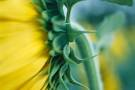

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
# Load iris data
iris = datasets.load_iris()

# Create features and target
X = iris.data
y = iris.target

# Create VarianceThreshold object with a variance with a threshold of 0.5
thresholder = VarianceThreshold(threshold=.5)

# Conduct variance thresholding
X_high_variance = thresholder.fit_transform(X)

# View first five rows with features with variances above threshold
X_high_variance[0:5]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2]])

# Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

## Digit Dataset

Each datapoint is a 8x8 image of a digit.

(1797, 64)


<Figure size 432x288 with 0 Axes>

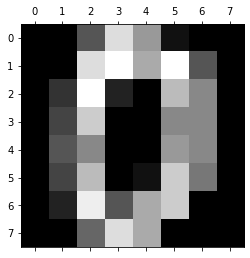

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 

plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

## Recursive Feature Elimination on Digit Dataset

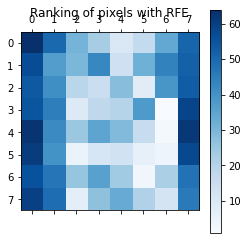

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

## Recursive Feature Elimination With Cross-Validation

A recursive feature elimination example with automatic tuning of the number of features selected with cross-validation.

Optimal number of features : 3


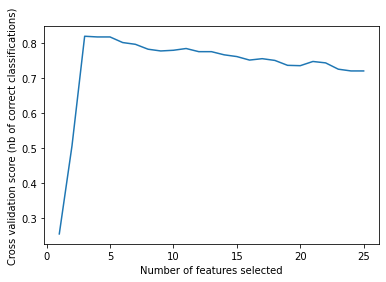

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Dimension Reduction: PCA

In dimension reduction we transform the feature space to a secondary space in which data points are more separable. One famous

method of dimension reduction is principal component analysis (PCA). PCA is a linear dimensionality reduction technique that

can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.

It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer

variation.

In PCA by means of obtainig eigenvalues and the corresponding eigenvectors of the data matrix, we form new feature space in

which each feature is a linear combination of the preliminary features. These new features are ranked from the one covering the

most variance in the data to the one which covers the least variance in the data. Then, we choose the first PCs which cover the 

most variance in the data. PCA is also a great help in visualizing high dimensional datasets as we can get valuable insight 

into the arrangement of the data points by visualizing them based on the forst two PCs.

Some application of PCA:

* Visualization: Iris Dataset
* Increase Speed by lowering the dimensionality
* Overcoming Curse of Dimensionality (Low number of samples in comparison with number of features)






## Visualization

### Iris Dataset


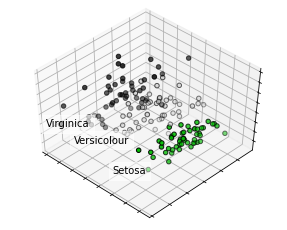

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Choosing the Optimum Number of PCs

To overcome curse of dimensionality and increase speed of the trainnig model in case of high-dimensional data.

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
data = dataset.data
data.shape

(569, 30)

In [ ]:
labels1 = dataset.target
labels1.shape

(569,)

In [ ]:
import numpy as np
labels = np.reshape(labels1,(569,1))
final_data = np.concatenate([data,labels],axis=1)
final_data.shape

(569, 31)

In [ ]:
import pandas as pd
cancer_dataset = pd.DataFrame(final_data)
features = dataset.feature_names
features
np.array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')
features_labels = np.append(features,'label')
cancer_dataset.columns = features_labels
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
cancer_dataset['label'].replace(0, 'Benign',inplace=True)
cancer_dataset['label'].replace(1, 'Malignant',inplace=True)
cancer_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [ ]:
# Visualization 
from sklearn.preprocessing import StandardScaler
x = cancer_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape

(569, 30)

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)
normalised_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


<Figure size 432x288 with 0 Axes>

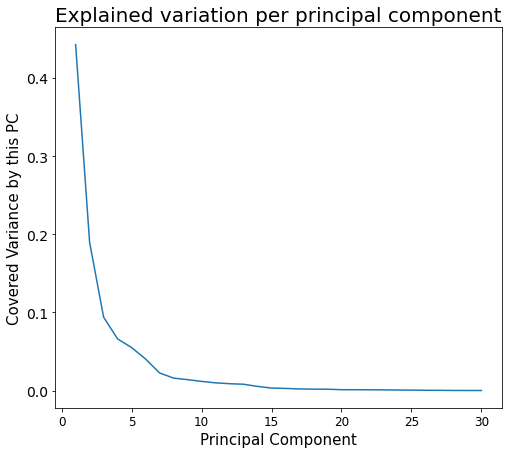

Explained variation per principal component for the first two PCs: [0.44272026 0.18971182]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_cancer = PCA(n_components=30)
principalComponents_cancer = pca_cancer.fit_transform(x)

xs = np.array(range(1,31))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca_cancer.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca_cancer.explained_variance_ratio_[0:2]))

<Figure size 432x288 with 0 Axes>

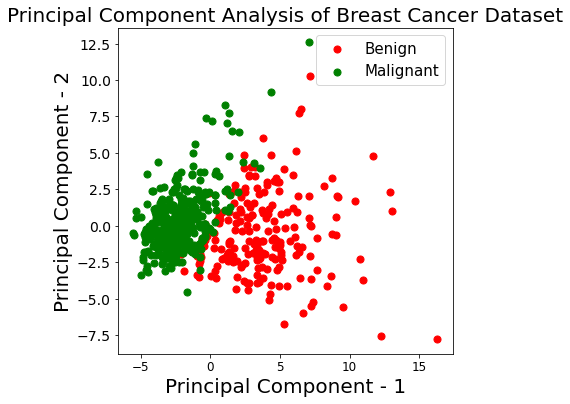

In [ ]:
# Visualization
pca_cancer = PCA(n_components=2)
principalComponents_cancer = pca_cancer.fit_transform(x)

principal_cancer_Df = pd.DataFrame(data = principalComponents_cancer
             , columns = ['principal component 1', 'principal component 2'])

plt.figure()
plt.figure(figsize=(6,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = cancer_dataset['label'] == target
    plt.scatter(principal_cancer_Df.loc[indicesToKeep, 'principal component 1']
               , principal_cancer_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [ ]:
transformed_dataset = principalComponents_cancer
post_pca_data = np.concatenate([transformed_dataset,labels],axis=1)
post_pca_data.shape

(569, 3)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = post_pca_data[:,0:2] 
y = post_pca_data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("After PCA: Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("The ACC: ", 1-(y_test != y_pred).sum() / X_test.shape[0] )
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb2 = GaussianNB()
y_pred = gnb2.fit(X_train, y_train).predict(X_test)
print("Pre PCA: Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print("The ACC: ", 1-(y_test != y_pred).sum() / X_test.shape[0] )

After PCA: Number of mislabeled points out of a total 285 points : 24
The ACC:  0.9157894736842105
Pre PCA: Number of mislabeled points out of a total 285 points : 18
The ACC:  0.9368421052631579


### CIFAR Dataset

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Shape of Labels:  (50000, 1) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


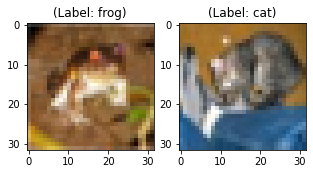

In [ ]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print('Shape of Labels: ' , y_train.shape,y_test.shape)
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

import matplotlib.pyplot as plt
%matplotlib inline
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


In [ ]:
# Data Exploration 
print(np.min(x_train),np.max(x_train))
x_train = x_train/255.0
print(np.min(x_train),np.max(x_train))
print('Sahpe:' , x_train.shape)

0 255
0.0 1.0
Sahpe: (50000, 32, 32, 3)


In [ ]:
new_num_of_features = 32*32*3
print("Number of features after flattening: new_num_of_features", new_num_of_features)

Number of features after flattening: new_num_of_features 3072


In [ ]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.

In [ ]:
pca_cifar = PCA(n_components = 1000)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])


<Figure size 432x288 with 0 Axes>

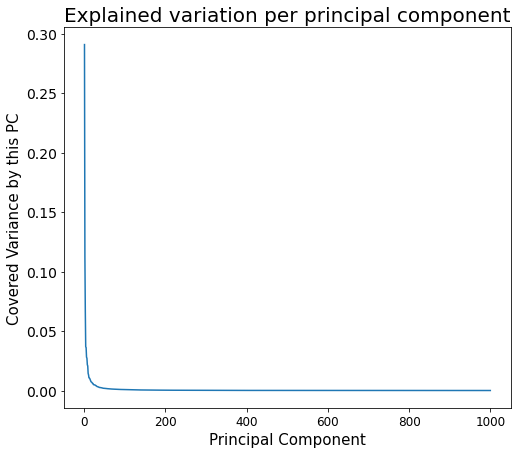

Explained variation per principal component for the first two PCs: [0.2907663  0.11253144]


In [ ]:
n_components = 1000
xs = np.array(range(1,n_components+1))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca_cifar.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca_cifar.explained_variance_ratio_[0:2]))

# Linear Discriminant Analysis (LDA)

We find the directions so to maximize the separability of data points of different classes. It is supervised while PCA is unsupervised.

## LDA Vs. PCA on Iris Dataset

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. 
Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels. LDA is used to find a linear combination of features that characterizes or separates classes. The resulting combination is used for dimensionality reduction before classification. Though PCA (unsupervised) attempts to find the orthogonal component axes of maximum variance in a dataset, however, the goal of LDA (supervised) is to find the feature subspace that optimizes class separability.

explained variance ratio (first two components): [0.92461872 0.05306648]


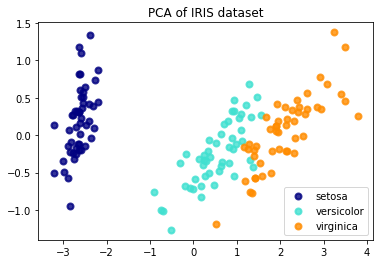

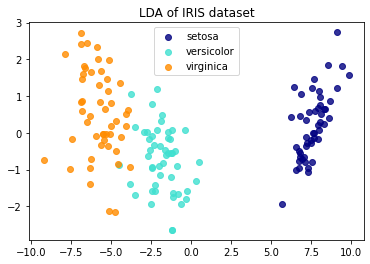

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# Independent Component Analysis (ICA)

Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal. Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component analysis focuses on independence, i.e. independent components.

Problem: To extract independent sources’ signals from a mixed signal composed of the signals from those sources.
Given: Mixed signal from five different independent sources.
Aim: To decompose the mixed signal into independent sources:

* Source 1
* Source 2
* Source 3
* ...

Solution: Independent Component Analysis (ICA).

Consider Cocktail Party Problem or Blind Source Separation problem to understand the problem which is solved by independent component analysis.

## Blind Source Decomposition Using ICA

Independent component analysis (ICA) is used to estimate sources given noisy measurements. Imagine 3 instruments playing simultaneously and 3 microphones recording the mixed signals. ICA is used to recover the sources ie. what is played by each instrument. Importantly, PCA fails at recovering our instruments since the related signals reflect non-Gaussian processes.

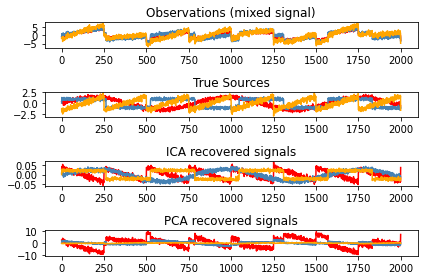

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

## ICA Vs. PCA

This example illustrates visually in the feature space a comparison by results using two different component analysis techniques.

Independent component analysis (ICA) vs Principal component analysis (PCA).

Representing ICA in the feature space gives the view of ‘geometric ICA’: ICA is an algorithm that finds directions in the feature space corresponding to projections with high non-Gaussianity. These directions need not be orthogonal in the original feature space, but they are orthogonal in the whitened feature space, in which all directions correspond to the same variance.

PCA, on the other hand, finds orthogonal directions in the raw feature space that correspond to directions accounting for maximum variance.

Here we simulate independent sources using a highly non-Gaussian process, 2 student T with a low number of degrees of freedom (top left figure). We mix them to create observations (top right figure). In this raw observation space, directions identified by PCA are represented by orange vectors. We represent the signal in the PCA space, after whitening by the variance corresponding to the PCA vectors (lower left). Running ICA corresponds to finding a rotation in this space to identify the directions of largest non-Gaussianity (lower right).

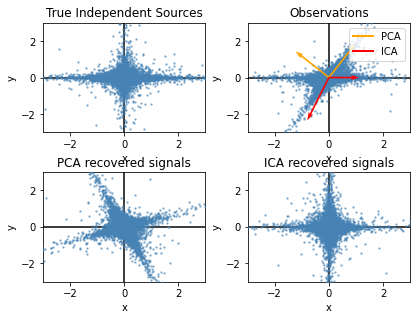

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA

# #############################################################################
# Generate sample data
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.

# Mix data
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)


# #############################################################################
# Plot results

def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver((0, 0), (0, 0), x_axis, y_axis, zorder=11, width=0.01,
                       scale=6, color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()

# References:

* https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/
* https://scikit-learn.org